In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import math
import sys

In [10]:
###create test data
inputs = ['10000000','01000000','00100000','00010000','00001000','00000100','00000010','00000001']

outputs = copy.deepcopy(inputs)

In [11]:
def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

def init_arch():
    ####creates neural net architecture for a 1 hidden layer NN
    return

def init_deltas(size_input,size_layer):
    weight = np.zeros((size_input,size_layer))
    bias = np.zeros(size_layer)
    return weight,bias

class layer:
    #####
    init_factor = 0.01
    #####define size of layer on creation
    def __init__(self, size_input, size_layer):
        ###read in sizes
        self.size_input = size_input
        self.size_layer = size_layer
        ###init arrays and randomize weights and bias upon creation
        self.weight = (np.random.rand(self.size_input,self.size_layer)-0.5)*self.init_factor
        self.bias = (np.random.rand(self.size_layer)-0.5)*self.init_factor
        self.activation = np.zeros(self.size_layer)
    ######propagate forward; takes list of inputs from previous layer
    def prop_forward(self,inputs):
        if len(inputs) == self.size_input:
            ##calculate
            z = np.transpose(self.weight).dot(inputs) + self.bias
            c = sigmoid(z)
            ##save
            self.activation = copy.deepcopy(c)
        else:
            sys.exit('This is the WRONG SIZE')
    ######propagate backward; takes list of outputs from previous layer
    def prop_backward(self,outputs,outputs_lminus1,lastlayer=False,propd_error=None):
        if len(outputs) == self.size_layer:
            ###calculate derivative of error per node
            if lastlayer == True:
                dEdC = outputs-self.activation
            else:
                dEdC = copy.deepcopy(propd_error)
            ###calculate derivative of activation per node
            dEdZ = dEdC * sigmoid(self.activation,derivative=True)
            ###calculate the derivative of bias per node
            dEdB = copy.deepcopy(dEdZ)
            ###calculate the derivative of weights
            tmp = np.outer(dEdZ,outputs_lminus1)
            dEdW = copy.deepcopy(tmp.transpose())
            ###calculate error of previous node
            error_lminus1 = np.matmul(self.weight,dEdZ)
            ###save relevant data
            self.dEdB = copy.deepcopy(dEdB)
            self.dEdW = copy.deepcopy(dEdW)
            ##
            self.dEdC = dEdC
            self.error_lminus1 = error_lminus1
        else:
            sys.exit('This is the WRONG SIZE')
        return(error_lminus1)
    
def transform_string(outputs):
    ##split up 
    outputs_np = [0.0]*len(outputs)
    for i in range(len(outputs)):
        outputs_np[i] = float(outputs[i])
    outputs_np = np.array(outputs_np)
    return(outputs_np)

In [12]:
#######define parameters
stepsize = 0.2
lambdasize = 0.01
#######define layers
layer1 = layer(8,3)
layer2 = layer(3,8)
######define number iterations
iterations = 10
#####
layer1_error = []
layer2_error = []
#####
delta_weight_1,delta_bias_1 = init_deltas(8,3)
delta_weight_2,delta_bias_2 = init_deltas(3,8)
#####
for i in range(iterations):
    ######go through examples
    for item in inputs:
        ###prop forward
        layer1.prop_forward(transform_string(item))
        layer2.prop_forward(layer1.activation)
        ###prop backward
        prop_result = layer2.prop_backward(transform_string(item),layer1.activation,True)
        prop_result = layer1.prop_backward(prop_result,transform_string(item),False,layer2.error_lminus1)
        
        ###
        print('l2error')
        print(layer2.error_lminus1)
        ###add delta term
        delta_bias_1 = delta_bias_1 + layer1.dEdB
        delta_bias_2 = delta_bias_2 + layer2.dEdB
        delta_weight_1 = delta_weight_1 + layer1.dEdW
        delta_weight_2 = delta_weight_2 + layer2.dEdW
    ######update terms
    layer1.bias = layer1.bias - stepsize*(delta_bias_1/float(len(inputs)))
    layer2.bias = layer2.bias - stepsize*(delta_bias_2/float(len(inputs)))
    layer1.weight = layer1.weight - stepsize*(delta_weight_1/float(len(inputs)))
    layer2.weight = layer2.weight - stepsize*(delta_weight_2/float(len(inputs)))
    #####check
    layer2_error.append(np.sum(layer2.dEdC))
    layer1_error.append(np.sum(layer1.dEdC))
    #####2
#     print(layer2.dEdW)
######output for input 1
###prop forward
layer1.prop_forward(transform_string(inputs[0]))
layer2.prop_forward(layer1.activation)
print(layer2.activation)

l2error
[-0.00031751  0.00165823  0.00037732]
l2error
[-0.00014094  0.00101057 -0.0003889 ]
l2error
[-0.00051552  0.00060437 -0.0003802 ]
l2error
[ 0.00029858  0.00035293 -0.00040128]
l2error
[ 0.0002342   0.00074976 -0.0010421 ]
l2error
[-0.00144098  0.00101465  0.00011685]
l2error
[ 0.00066369  0.00090272 -0.00139619]
l2error
[ -1.47050717e-03   1.93689158e-03  -7.23663769e-05]
l2error
[ 0.00575837  0.00772338  0.00647732]
l2error
[ 0.00593436  0.00707636  0.00571134]
l2error
[ 0.0055556   0.00666242  0.00571634]
l2error
[ 0.00638044  0.00641942  0.0057002 ]
l2error
[ 0.00631773  0.00681834  0.00506084]
l2error
[ 0.00463592  0.00707956  0.00621876]
l2error
[ 0.00674572  0.00696803  0.00470327]
l2error
[ 0.00460736  0.00800685  0.00603131]
l2error
[ 0.0171074   0.0190495   0.01787166]
l2error
[ 0.0172817   0.01840334  0.01710574]
l2error
[ 0.01689497  0.01797429  0.01710368]
l2error
[ 0.01774137  0.01774837  0.01709756]
l2error
[ 0.01768177  0.01815118  0.01646096]
l2error
[ 0.0159870

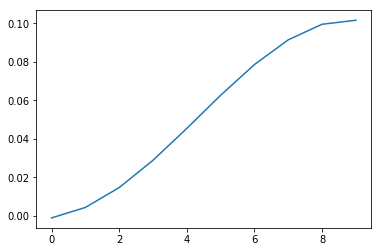

In [9]:
plt.plot(layer1_error)
plt.show()


In [5]:
layer1.activation

array([ 0.51624431,  0.51559644,  0.51556526])

In [ ]:
plt.plot(layer2_error)
plt.show()
